In [26]:

!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [27]:

%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [28]:

!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [29]:

!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int it_tb_

In [30]:

!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-26 18:14:21--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  1.23MB/s    in 2m 47s  

2020-06-26 18:17:09 (1.41 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [31]:

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)


def download(path):
  from google.colab import files
  files.download(path)

In [32]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 0JB8HLTstajraporustaj.doc
 1.docx
'Adsız doküman (1).gdoc'
'Adsız doküman (2).gdoc'
'Adsız doküman.gdoc'
'Adsız doküman - Sütun grafik 1.gsheet'
 all.txt
'Başlıksız e-tablo.gsheet'
'Bildiri Formatı Son.docx'
'BİTİRME TASLAK (1)'
'BİTİRME TASLAK.gdoc'
'Biyometrik Sistemlere Giriş'
'Biyometrik Sistemlere Giriş -İRİS TANIMA'
'BİYOMETRİK SİSTEMLERE GİRİŞ-İRİS TANIMA -1 (1).gdoc'
'BİYOMETRİK SİSTEMLERE GİRİŞ-İRİS TANIMA -1.gdoc'
'BİYOMETRİK SİSTEMLERE GİRİŞ-İRİS TANIMA -1.pdf'
'Biyometrik Sistemlere Giriş -İRİS TANIMA.zip'
 BS416_1030516303-Düzeltme.gdoc
 BS440_1030516303.gdoc
 BS444_1030516303.gdoc
 BZ410_1030516303.gdoc
'Colab Notebooks'
 deneme.docx
 erciyes_1030516303_Özlem_Alçı.rar
'Final-Tübitak 1512 Girişimcilik-AKOM(1).doc'
'Final-Tübitak 1512 Girişimcilik.doc'
 GAN.mp4
'Güz Dönemi Yazılım Stajı.docx'
'ilk kısım.docx'
 images
 imza_tanima.mp4
'İRİS TANIMA VİZE .gdoc'
'İRİS TANIMA - VİZE.pptx'
 kmeans.mp4
'kopya 1.docx'
'kopya 

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

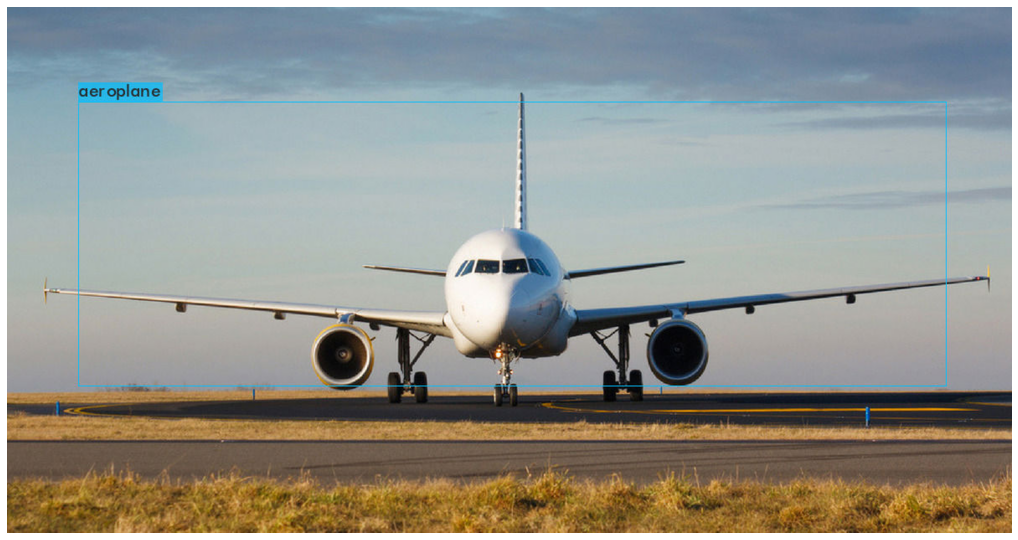

In [33]:

%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/images/plane.jpg
imShow('predictions.jpg')

In [14]:

!ls /mydrive/yolo_v3

backup	 backup2  generate_train.py  obj.names	yolov3-custom.cfg
backup1  cfg	  obj.data	     obj.zip


In [15]:

!cp /mydrive/yolo_v3/obj.zip ../

In [16]:

!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/0005a922e055c723.jpg  
  inflating: data/obj/0005a922e055c723.txt  
  inflating: data/obj/000610ca2148a5ec.jpg  
  inflating: data/obj/000610ca2148a5ec.txt  
  inflating: data/obj/000872c905a57b65.jpg  
  inflating: data/obj/000872c905a57b65.txt  
  inflating: data/obj/00097c09aca0cabf.jpg  
  inflating: data/obj/00097c09aca0cabf.txt  
  inflating: data/obj/002c60d5fbc94244.jpg  
  inflating: data/obj/002c60d5fbc94244.txt  
  inflating: data/obj/0031abbb357b6fa1.jpg  
  inflating: data/obj/0031abbb357b6fa1.txt  
  inflating: data/obj/00322457d58b15f7.jpg  
  inflating: data/obj/00322457d58b15f7.txt  
  inflating: data/obj/003bfa647c199309.jpg  
  inflating: data/obj/003bfa647c199309.txt  
  inflating: data/obj/004bd64410736c69.jpg  
  inflating: data/obj/004bd64410736c69.txt  
  inflating: data/obj/004d150f127cfba6.jpg  
  inflating: data/obj/004d150f127cfba6.txt  
  inflating: data/obj/005f6296062603a9.jpg  
  inflating

In [17]:

!cp /mydrive/yolo_v3/yolov3-custom.cfg ./cfg

In [18]:

!cp /mydrive/yolo_v3/obj.names ./data
!cp /mydrive/yolo_v3/obj.data  ./data


In [19]:

!cp /mydrive/yolo_v3/generate_train.py ./



In [20]:
!python generate_train.py

In [21]:

!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [22]:

!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-06-26 17:20:53--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  1.61MB/s    in 90s     

2020-06-26 17:22:24 (1.72 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# Eğitim Aşaması
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3-custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104

In [ ]:
imShow('chart.png')

In [23]:
#Test Modu
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..


/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

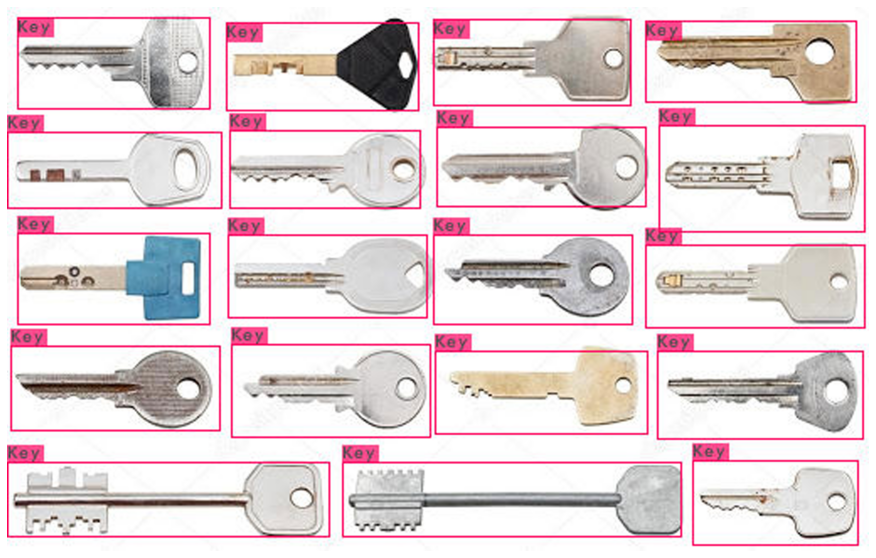

In [24]:

!./darknet detector test data/obj.data cfg/yolov3-custom.cfg /mydrive/yolo_v3/backup2/cfg_last.weights /mydrive/images/key2.jpg -thresh 0.3
imShow('predictions.jpg')